In [1]:
import os
import sys
sys.path.insert(0,os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd
from scripts.database import DataBaseConnection
from scripts.userAnalysis import UserAnalysis
from scripts.userEngegement import UserEngagement
from dotenv import load_dotenv

# loading enviromental variable from .env
load_dotenv()

True

In [3]:
host=os.getenv("DB_HOST")
database=os.getenv("DB_DATABASE")
user=os.getenv("DB_USER")
password=os.getenv("DB_PASSWORD")
port=os.getenv("DB_PORT")
db=DataBaseConnection(host, database, user,password,port)

In [4]:
user_engagement=UserEngagement()

In [5]:
db_connection=user_engagement.creating_connection(db)
data=user_engagement.read_data(db, db_connection)

Connection to PostgreSQL successful
Connection to PostgreSQL closed


In [6]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
user_analysis=UserAnalysis()

In [8]:
df=user_analysis.handleMissing(data)

In [9]:
df.head()

,Start,End,Last Location Name,Handset Manufacturer,Handset Type,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
62,4/21/2019 2:55,4/25/2019 0:17,D72939C,Huawei,Huawei B528S-23A,1.304243e+19,73.0,262.0,336160.0,2.082018e+14,...,22833724.0,10951633.0,18426843.0,8632677.0,576998244.0,9724918.0,446979790.0,14067203.0,46797611.0,632600264.0
65,4/21/2019 8:26,4/25/2019 1:20,L11120C,Samsung,Samsung Galaxy S6 Edge (Sm-G925X),1.311448e+19,605.0,655.0,320001.0,2.082017e+14,...,12074277.0,12363961.0,20574393.0,624225.0,552413006.0,1112977.0,142091905.0,1299874.0,18261248.0,597244693.0
66,4/21/2019 8:54,4/25/2019 0:48,L11864B,Samsung,Samsung Galaxy S9 Sm-G960F Ds,7.349883e+18,105.0,931.0,316419.0,2.082019e+14,...,5550520.0,20670762.0,19227109.0,13789484.0,507419487.0,9991757.0,348565519.0,3391925.0,50065095.0,538809148.0
67,4/21/2019 9:19,4/25/2019 4:42,D73388C,Samsung,Samsung Galaxy A6 Sm-A600Fn Ds,1.311448e+19,590.0,965.0,329003.0,2.082021e+14,...,10185468.0,13079138.0,15416344.0,6144270.0,124816679.0,1214873.0,483852157.0,6057834.0,29436200.0,162196572.0
68,4/21/2019 10:09,4/25/2019 1:39,T72937C,Samsung,Samsung Galaxy A8 (2018),1.304243e+19,1.0,272.0,314961.0,2.082014e+14,...,22191188.0,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0


In [10]:
df_featured=user_analysis.feature_engineering(df)

In [11]:
df_featured.head()

,Last Location Name,Handset Manufacturer,Handset Type,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session_Duration
62,D72939C,Huawei,Huawei B528S-23A,1.304243e+19,336160.0,2.082018e+14,3.376353e+10,8.637690e+13,52.0,11.0,...,10951633.0,18426843.0,8632677.0,576998244.0,9724918.0,446979790.0,14067203.0,46797611.0,632600264.0,336120.0
65,L11120C,Samsung,Samsung Galaxy S6 Edge (Sm-G925X),1.311448e+19,320001.0,2.082017e+14,3.366364e+10,3.564211e+13,30.0,3.0,...,12363961.0,20574393.0,624225.0,552413006.0,1112977.0,142091905.0,1299874.0,18261248.0,597244693.0,320040.0
66,L11864B,Samsung,Samsung Galaxy S9 Sm-G960F Ds,7.349883e+18,316419.0,2.082019e+14,3.366010e+10,3.579881e+13,45.0,5.0,...,20670762.0,19227109.0,13789484.0,507419487.0,9991757.0,348565519.0,3391925.0,50065095.0,538809148.0,316440.0
67,D73388C,Samsung,Samsung Galaxy A6 Sm-A600Fn Ds,1.311448e+19,329003.0,2.082021e+14,3.365079e+10,3.575751e+13,45.0,5.0,...,13079138.0,15416344.0,6144270.0,124816679.0,1214873.0,483852157.0,6057834.0,29436200.0,162196572.0,328980.0
68,T72937C,Samsung,Samsung Galaxy A8 (2018),1.304243e+19,314961.0,2.082014e+14,3.366274e+10,3.528141e+13,853.0,2.0,...,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0,315000.0


In [12]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [13]:
engagementData=user_engagement.engagement_metrics(df_featured)

In [14]:
engagementData.head()

,MSISDN,Session Frequency,Total Duration (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
0,3.360100e+10,1,116720.0,842637466.0,36053108.0,878690574.0
1,3.360100e+10,1,181230.0,120755184.0,36104459.0,156859643.0
2,3.360100e+10,1,134969.0,556659663.0,39306820.0,595966483.0
3,3.360101e+10,1,49878.0,401993172.0,20327526.0,422320698.0
4,3.360101e+10,1,18549.0,547096937.0,38481427.0,585578364.0


### Interpretation:

- This step will help identify power users based on different engagement metrics, providing insights into which users are consuming the most resources or have the highest activity on the network.

In [15]:
user_engagement.top_10_userByEngagement(engagementData)

Top 10 Customers by Session Frequency:
              MSISDN  Session Frequency
48952  3.366371e+10                900
34156  3.365973e+10                 11
69073  3.367588e+10                 10
64094  3.366907e+10                  9
23284  3.365043e+10                  9
1566   3.360658e+10                  9
52275  3.366475e+10                  8
81774  3.369998e+10                  8
53756  3.366519e+10                  8
83838  3.376041e+10                  8
Top 10 Customers by Session Duration:
              MSISDN  Total Duration (ms)
48952  3.366371e+10           59031184.0
34156  3.365973e+10            2578418.0
69073  3.367588e+10            2269343.0
36155  3.366027e+10            1943237.0
52275  3.366475e+10            1901398.0
52169  3.366471e+10            1770693.0
68923  3.367557e+10            1711214.0
48971  3.366371e+10            1659084.0
14013  3.362845e+10            1643561.0
85080  3.376101e+10            1607597.0
Top 10 Customers by Total Traffic:
      

### Normalization and Clustering
- **Objective**:

Normalize the engagement metrics and cluster users into three groups (using K-means) based on their engagement levels.
Determine the optimal number of clusters (k) using the Elbow Method.

Cluster users into three engagement groups using the normalized metrics and the K-means algorithm.

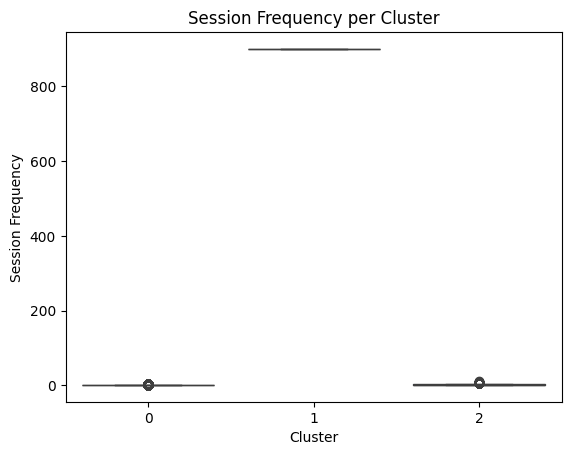

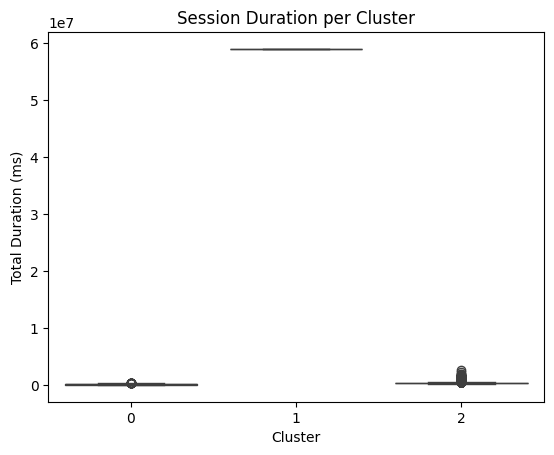

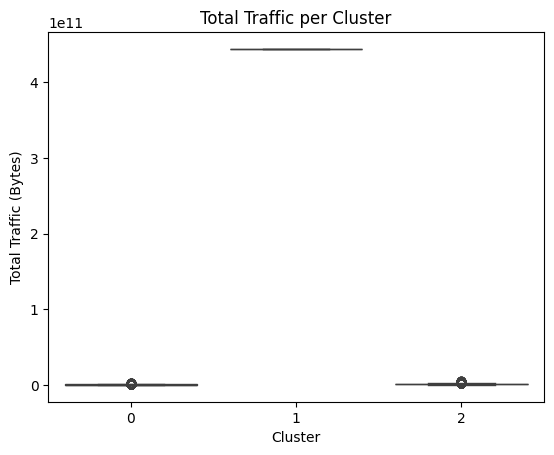

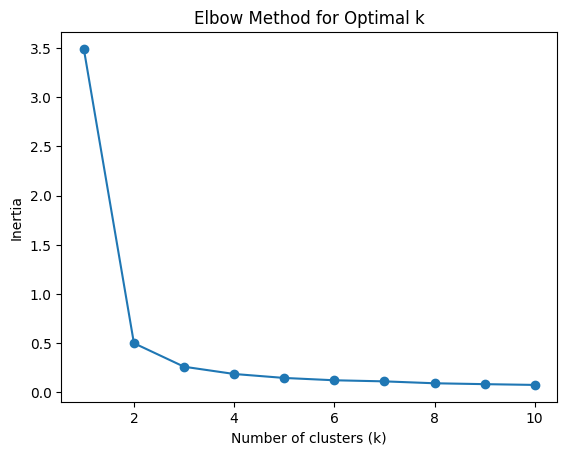

In [16]:
clustedEngagement, normalized_metrics=user_engagement.normalizatoin_and_clusteringEngagement(engagementData)

##### Interpretation:

- ***Elbow Method***: This graph helps determine the optimal number of clusters. When the graph shows a sharp "elbow" or bend, the number of clusters at that point is optimal.

In [17]:
clustedEngagement

Session Frequency                         Total Duration (ms)  \
                      min  max        mean    sum                 min   
Cluster                                                                 
0                       1    4    1.149098  96777              7142.0   
1                     900  900  900.000000    900          59031184.0   
2                       1   11    2.495759  30598             85554.0   

                                                Total Traffic (Bytes)  \
                max          mean           sum                   min   
Cluster                                                                 
0          288149.0  1.033832e+05  8.706930e+09          3.324901e+07   
1        59031184.0  5.903118e+07  5.903118e+07          4.442324e+11   
2         2578418.0  3.510949e+05  4.304424e+09          6.010710e+07   

                                                   
                  max          mean           sum  
Cluster                                            
0        2.522556e+09  5.653138e+08  4.761073e+13  
1        4.442324e+11  4.442324e+11  4.442324e+11  
2        5.179123e+09  1.267464e+09  1.553911e+13

##### Interpretation:
- ***K-Means Clustering***: Clustering the users into three groups helps identify users with low, medium, and high engagement levels. The aggregated metrics for each cluster provide a summary of the engagement level in each group.

### Application-Specific Engagement Analysis
Objective:

Identifying the top 10 most engaged users per application (e.g., Social Media, Gaming).
Visualizing the top 3 most used applications using appropriate charts.

In [19]:
app_traffic=user_engagement.app_traffic(df_featured)

In [20]:
user_engagement.top_10_mostEngage_User_PerApplication(app_traffic)

Top 10 Most Engaged Users in Social Media:
        MSISDN/Number  Total Social Media Traffic
48952   3.366371e+10                1.647510e+09
34156   3.365973e+10                2.397536e+07
64094   3.366907e+10                1.931896e+07
36082   3.366025e+10                1.906945e+07
23284   3.365043e+10                1.805513e+07
12849   3.362632e+10                1.767131e+07
81774   3.369998e+10                1.676097e+07
35214   3.366003e+10                1.651904e+07
1566    3.360658e+10                1.646416e+07
50978   3.366433e+10                1.631757e+07
Top 10 Most Engaged Users in Google:
        MSISDN/Number  Total Google Traffic
48952   3.366371e+10          6.889353e+09
1566    3.360658e+10          8.549232e+07
34156   3.365973e+10          8.110032e+07
69073   3.367588e+10          7.950418e+07
23284   3.365043e+10          7.871957e+07
69167   3.367608e+10          7.197485e+07
80954   3.369967e+10          6.958570e+07
2208    3.360816e+10          6.947

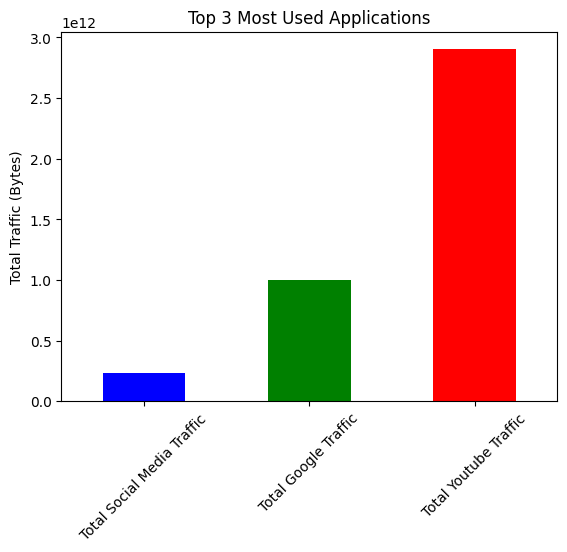

In [21]:
user_engagement.top_3Most_userApplication(app_traffic)

In [22]:
normalized_metrics

array([[0.00000000e+00, 1.85649773e-03, 1.90329410e-03],
       [0.00000000e+00, 2.94944220e-03, 2.78277530e-04],
       [0.00000000e+00, 2.16567683e-03, 1.26681357e-03],
       ...,
       [0.00000000e+00, 2.90361341e-03, 1.55288180e-03],
       [0.00000000e+00, 2.82596709e-05, 1.53398015e-03],
       [0.00000000e+00, 2.26765222e-03, 1.00643677e-03]])

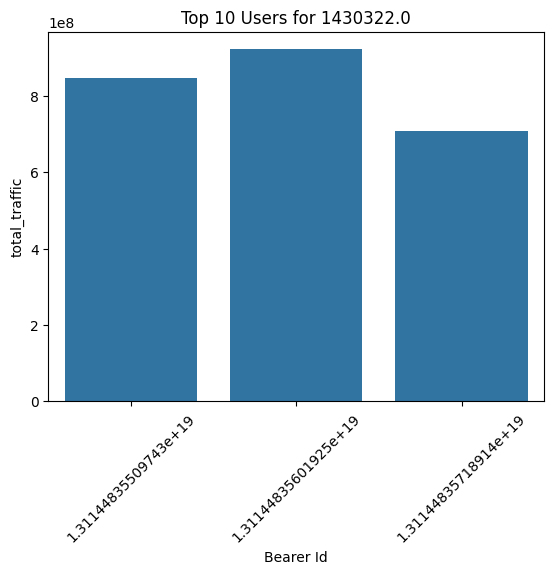

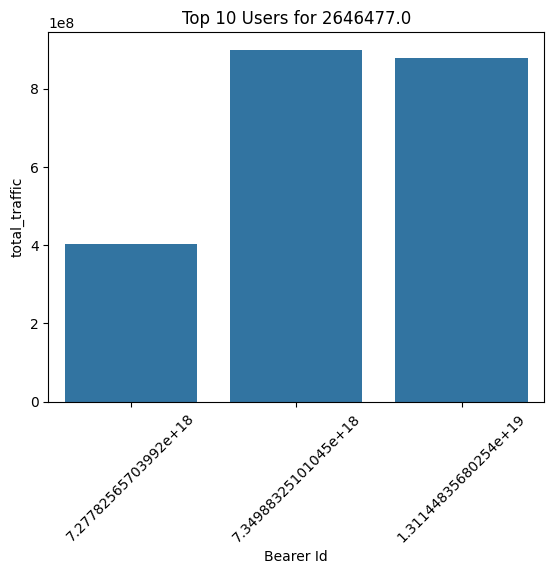

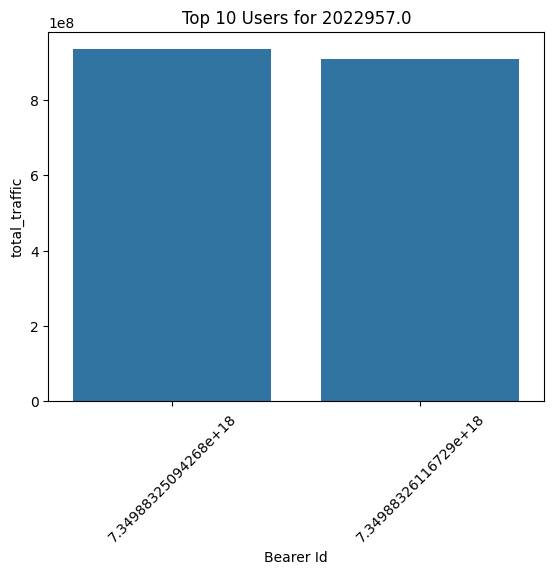

In [19]:
user_engagement.application_spacificEngagement(df_featured)

### Interpretation:

This step helps understand which applications are driving the most traffic and which users are the most engaged per application. It can guide decisions on which applications need more network resources or targeted marketing campaigns.